In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:02<00:00, 634kB/s]

Extracting files...


Path to dataset files: C:\Users\saxen\.cache\kagglehub\datasets\abdallahwagih\telco-customer-churn\versions\1


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_excel('C:\\Users\\saxen\\Documents\\Telco\\Telco_customer_churn.xlsx')


In [24]:
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [26]:
df["Total Charges"]=df["Total Charges"].replace(" ",0.0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [28]:
df.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [30]:
df["CustomerID"].duplicated().sum()

np.int64(0)

In [41]:
(df["Senior Citizen"]=="yes").sum()

np.int64(0)

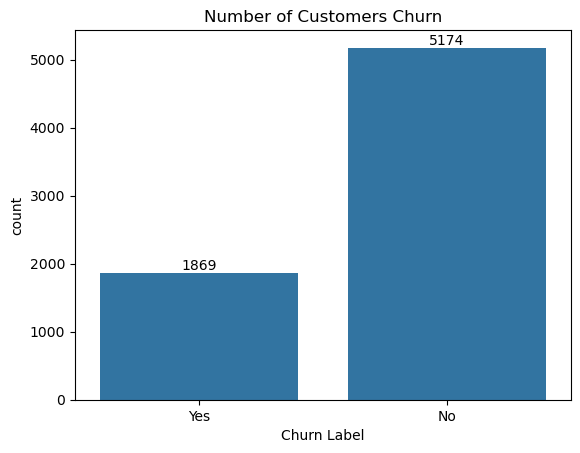

In [57]:
a= sns.countplot(x="Churn Label",data=df)
a.bar_label(a.containers[0])
plt.title("Number of Customers Churn")
plt.show()

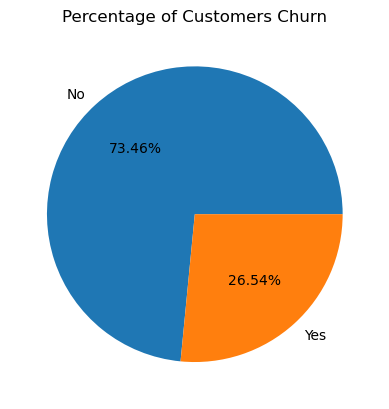

In [58]:
gb=df.groupby("Churn Label").agg({"Churn Label":"count"})
plt.pie(gb["Churn Label"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Customers Churn")
plt.show()

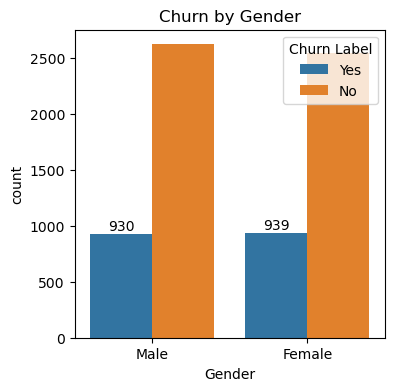

In [66]:
plt.figure(figsize=(4,4))
q=sns.countplot(x="Gender" , data=df ,hue="Churn Label")
q.bar_label(q.containers[0])

plt.title("Churn by Gender")
plt.show()

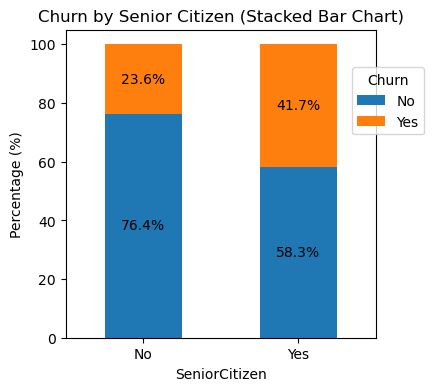

In [69]:
total_counts = df.groupby('Senior Citizen')['Churn Label'].value_counts(normalize=True).unstack() * 100
fig, ax = plt.subplots(figsize=(4, 4))  
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e']) 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))

plt.show()

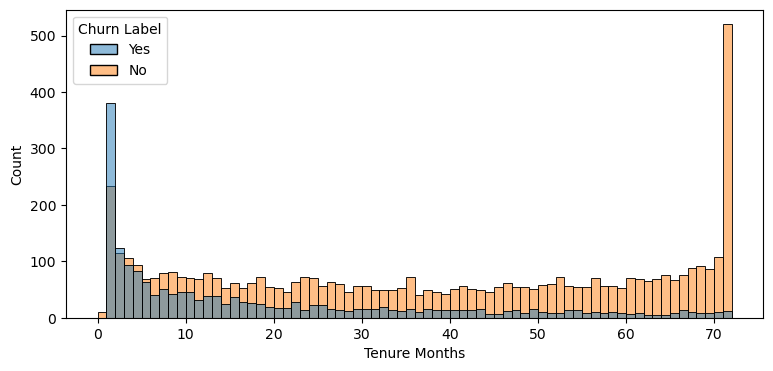

In [73]:
plt.figure(figsize = (9,4))
sns.histplot(x = "Tenure Months", data = df, bins = 72, hue = "Churn Label")
plt.show()

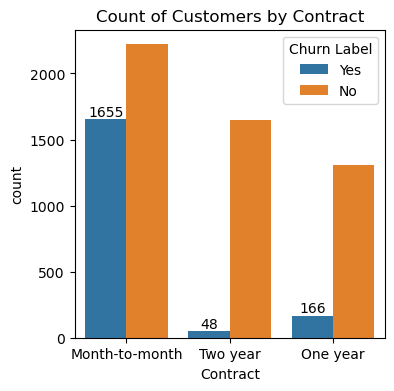

In [75]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn Label")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

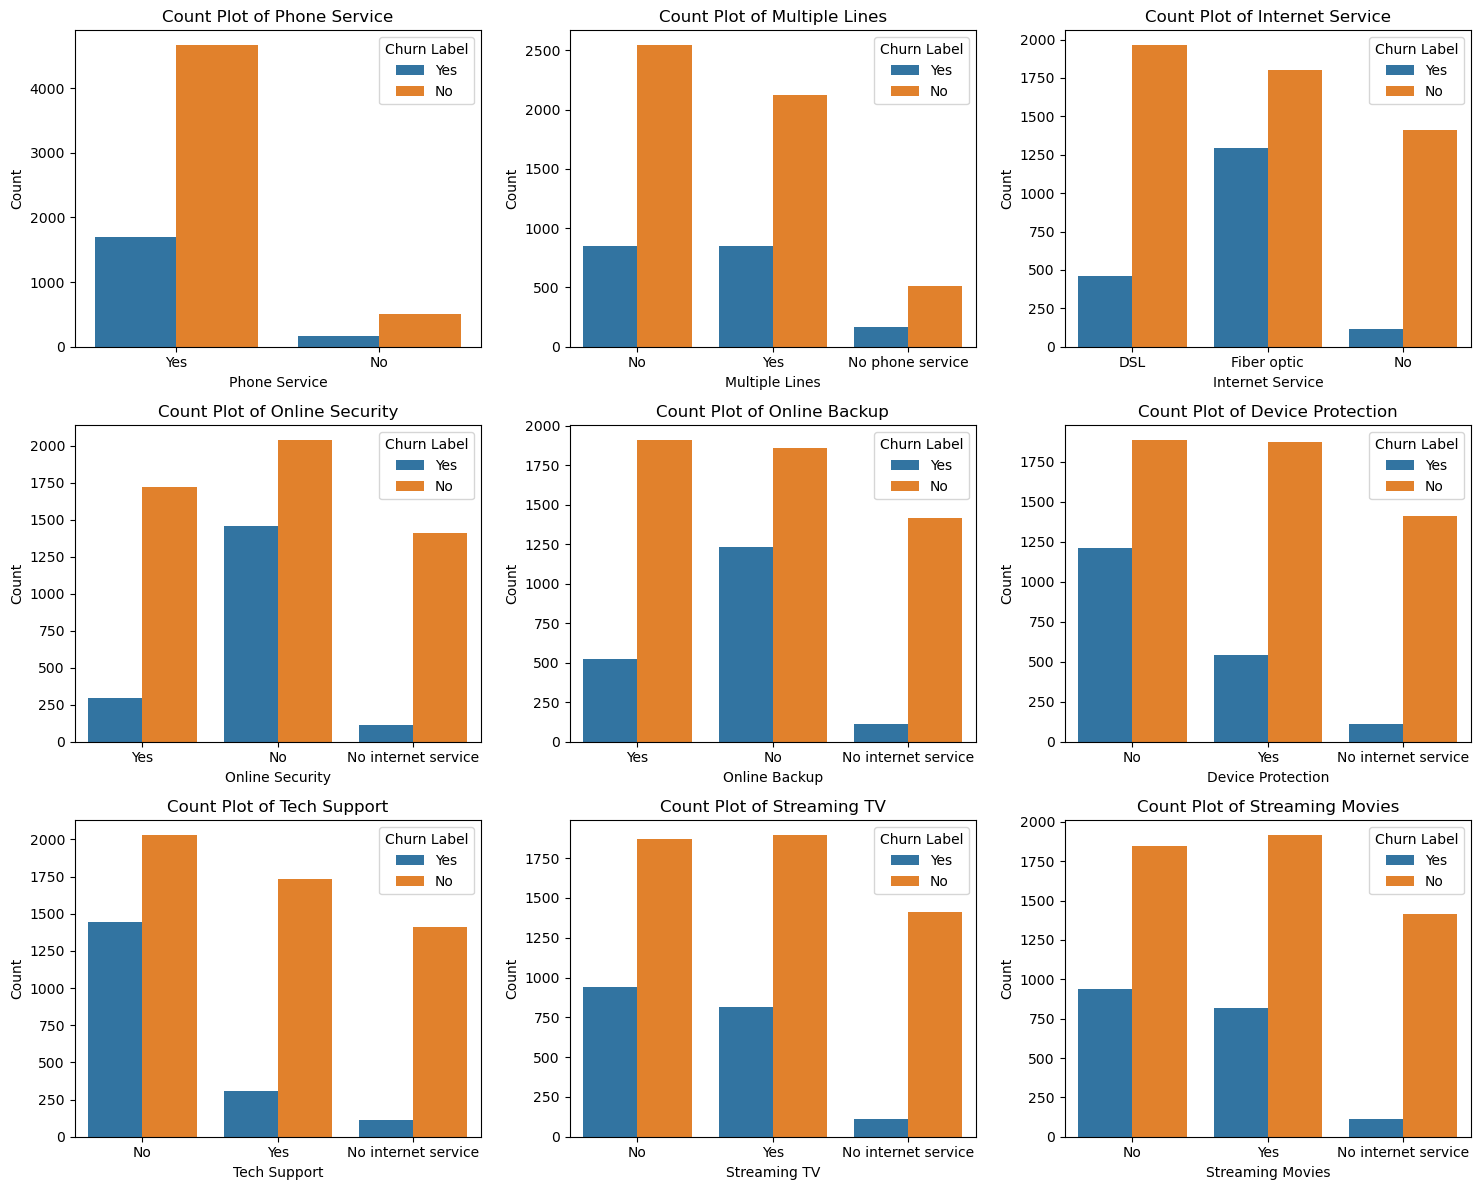

In [82]:
columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
           'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn Label"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

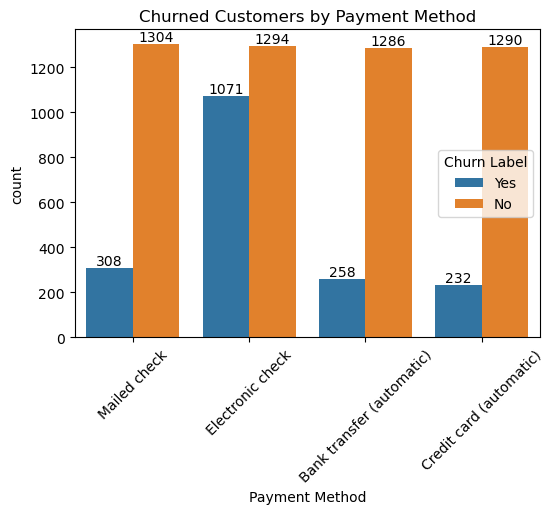

In [83]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Payment Method", data = df, hue = "Churn Label")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()